# Imputing data base on the price of used car

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read the data

df = pd.read_csv('data/df_imputing.csv')
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,33590.0,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
1,22590.0,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
2,39590.0,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
3,30990.0,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
4,15000.0,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258940 entries, 0 to 258939
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         258940 non-null  float64
 1   year          258937 non-null  float64
 2   manufacturer  258940 non-null  object 
 3   condition     167071 non-null  object 
 4   cylinders     160807 non-null  object 
 5   fuel          257606 non-null  object 
 6   odometer      257861 non-null  float64
 7   title_status  255548 non-null  object 
 8   transmission  257814 non-null  object 
 9   drive         184571 non-null  object 
 10  size          83481 non-null   object 
 11  type          201080 non-null  object 
 12  paint_color   188093 non-null  object 
 13  state         258940 non-null  object 
dtypes: float64(3), object(11)
memory usage: 27.7+ MB


### Divide dataframe into 3 part base on the price 

In [4]:
df_1 = df[df['price']<=15000].copy()

In [5]:
df_1.shape

(137094, 14)

In [6]:
df_2 = df[(df['price']>15000) & (df['price']<=50000)].copy()

In [7]:
df_2.shape

(114156, 14)

In [8]:
df_3 = df[df['price']>50000].copy()

In [9]:
df_3.shape

(7690, 14)

### Compare the difference between price and features of three dataframes

In [10]:
df_1['condition'].mode()[0],df_2['condition'].mode()[0], df_3['condition'].mode()[0]

('excellent', 'good', 'excellent')

In [11]:
df_1['cylinders'].mode()[0],df_2['cylinders'].mode()[0], df_3['cylinders'].mode()[0]

('4 cylinders', '6 cylinders', '8 cylinders')

In [12]:
df_1['fuel'].mode()[0],df_2['fuel'].mode()[0], df_3['fuel'].mode()[0]

('gas', 'gas', 'gas')

In [13]:
df_1['odometer'].mean(),df_2['odometer'].mean(), df_3['odometer'].mean()

(138468.63644221754, 63606.08188878042, 37953.78982474496)

In [14]:
df_1['title_status'].mode()[0],df_2['title_status'].mode()[0], df_3['title_status'].mode()[0]

('clean', 'clean', 'clean')

In [15]:
df_1['transmission'].mode()[0],df_2['transmission'].mode()[0], df_3['transmission'].mode()[0]

('automatic', 'automatic', 'automatic')

In [16]:
df_1['drive'].mode()[0],df_2['drive'].mode()[0], df_3['drive'].mode()[0]

('fwd', '4wd', '4wd')

In [17]:
df_1['size'].mode()[0],df_2['size'].mode()[0], df_3['size'].mode()[0]

('full-size', 'full-size', 'full-size')

In [18]:
df_1['type'].mode()[0],df_2['type'].mode()[0], df_3['type'].mode()[0]

('sedan', 'SUV', 'truck')

In [19]:
df_1['paint_color'].mode()[0],df_2['paint_color'].mode()[0], df_3['paint_color'].mode()[0]

('white', 'white', 'white')

* with difference range of price, the type, odometer, cylinder of used car are different. 

### Imputing data

In [20]:
## Fill Missing Values for df_1
for col in list(df_1.select_dtypes('object').columns.values):
    df_1[col] = df_1[col].fillna(df_1[col].mode()[0])

In [21]:
## Fill Missing Values for df_2
for col in list(df_2.select_dtypes('object').columns.values):
    df_2[col] = df_2[col].fillna(df_2[col].mode()[0])

In [22]:
## Fill Missing Values for df_3
for col in list(df_3.select_dtypes('object').columns.values):
    df_3[col] = df_3[col].fillna(df_3[col].mode()[0])

In [23]:
df_1.isnull().sum()

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer        582
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
state             0
dtype: int64

In [24]:
df_1['odometer'] = df_1['odometer'].fillna(df_1['odometer'].mean())

In [25]:
df_2['odometer'] = df_2['odometer'].fillna(df_2['odometer'].mean())

In [26]:
df_3['odometer'] = df_3['odometer'].fillna(df_3['odometer'].mean())

In [27]:
df_2.isnull().sum()

price           0
year            1
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [28]:
df_2[df_2['year'].isnull()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
153028,34888.0,NaN,land rover,good,4 cylinders,gas,40418.0,clean,automatic,4wd,full-size,SUV,black,nj


In [29]:
df_2[df_2['manufacturer']=='land rover']

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
480,22000.0,2013.0,land rover,good,8 cylinders,gas,119550.0,clean,automatic,4wd,full-size,SUV,white,al
1089,36495.0,2017.0,land rover,good,4 cylinders,gas,88.0,clean,automatic,4wd,full-size,SUV,white,al
1866,41000.0,2014.0,land rover,like new,8 cylinders,gas,60000.0,clean,automatic,4wd,full-size,SUV,black,al
1899,16989.0,2012.0,land rover,good,8 cylinders,gas,121609.0,clean,automatic,4wd,full-size,SUV,white,al
1904,35900.0,2014.0,land rover,good,6 cylinders,gas,94780.0,clean,automatic,4wd,full-size,SUV,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253279,33990.0,2016.0,land rover,excellent,4 cylinders,gas,39696.0,clean,automatic,4wd,full-size,SUV,black,wi
254627,18995.0,2012.0,land rover,good,8 cylinders,gas,101363.0,clean,automatic,4wd,full-size,SUV,black,wi
256874,20000.0,2013.0,land rover,excellent,8 cylinders,gas,67000.0,rebuilt,automatic,4wd,full-size,SUV,white,wi
257349,25000.0,2017.0,land rover,excellent,4 cylinders,gas,72000.0,clean,automatic,4wd,mid-size,SUV,white,wi


In [30]:
# the closest value for the year is 2017

df_2['year'].fillna(2017, inplace=True)

In [31]:
df_3.isnull().sum()

price           0
year            2
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [32]:
df_3[df_3['year'].isnull()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
1735,71989.0,NaN,land rover,excellent,6 cylinders,gas,41865.0,clean,automatic,4wd,full-size,SUV,grey,al
218087,71989.0,NaN,land rover,excellent,6 cylinders,gas,41865.0,clean,automatic,4wd,full-size,SUV,grey,tn


In [33]:
df_3[df_3['manufacturer']=='land rover']

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
549,52997.0,2017.0,land rover,excellent,6 cylinders,gas,58947.0,clean,automatic,4wd,full-size,SUV,white,al
1735,71989.0,NaN,land rover,excellent,6 cylinders,gas,41865.0,clean,automatic,4wd,full-size,SUV,grey,al
3101,59995.0,2018.0,land rover,excellent,6 cylinders,gas,31959.0,clean,automatic,4wd,full-size,SUV,grey,ak
4055,52995.0,2016.0,land rover,excellent,8 cylinders,gas,53739.0,clean,automatic,4wd,full-size,SUV,black,ak
4108,72995.0,2017.0,land rover,excellent,8 cylinders,gas,29634.0,clean,automatic,4wd,full-size,SUV,black,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247874,68900.0,2017.0,land rover,excellent,6 cylinders,gas,29084.0,clean,automatic,4wd,full-size,SUV,white,wa
247927,67900.0,2018.0,land rover,excellent,6 cylinders,diesel,20778.0,clean,automatic,4wd,full-size,SUV,white,wa
248163,54999.0,2016.0,land rover,excellent,8 cylinders,gas,58643.0,clean,automatic,4wd,full-size,SUV,white,wa
248939,93950.0,2018.0,land rover,excellent,8 cylinders,gas,17535.0,clean,automatic,4wd,full-size,SUV,black,wa


In [34]:
# the closest value of year is 2017

df_3['year'].fillna(2017, inplace=True)

In [35]:
# concat three dataframe 

df_concat = pd.concat([df_1,df_2,df_3], ignore_index=True, sort = False)

In [36]:
df_concat.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [37]:
# save the dataframe as csv for recommender system

# df_concat.to_csv('data/df_model.csv', index = False)

### Modeling

In [38]:
list(df_concat.select_dtypes('object').columns.values)

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [39]:
df_dummy = pd.get_dummies(df_concat, columns=['manufacturer','condition','cylinders','fuel','title_status',
                                 'transmission','drive','size','type','paint_color','state'], 
                    dtype=float, drop_first=True)
df_dummy.head()

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,15000.0,2013.0,128000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4500.0,1992.0,192000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14000.0,2012.0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15000.0,2017.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,2004.0,176144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# save this as csv 

df_dummy.to_csv('data/df_dummy.csv', index = False)

In [41]:
X = df_dummy.drop(columns='price')
y = df_dummy['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [43]:
# use this function to save the result

def evaluation(X_train, y_train, X_test, y_test, preds, model):
    train_score = model.score(X_train, y_train)
    R2 = r2_score(y_test, preds)
    RMSE = np.sqrt(mean_squared_error(y_test, preds))

    print(f'train score: {train_score}')
    print(f'R2 (test score): {R2}')
    print(f'RMSE: {RMSE}')
          
    return {
        'train score' : train_score,
        'R2 (test score)': R2,
        'RMSE': RMSE,
    }

In [44]:
# save the result as a list

score = []

In [45]:
# plot the actual vs the predicted price
# https://github.com/olisauzondu/Used_Car_Project/blob/main/used_cars_Recommender_System_%26_Price_Prediction_Model.ipynb

def plot_actual_predict(model):

    y_pred=(model.predict(X_test))

    number_of_observations=50

    x_ax = range(len(y_test[:number_of_observations]))

    plt.figure(figsize=(16,8))
    plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
    plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
    plt.title("Used Car Price - Actual vs Predicted data")
    plt.xlabel('Observation Number')
    plt.ylabel('Price')
    plt.xticks(np.arange(number_of_observations))
    plt.legend()
    plt.grid()
    plt.show()

### Null Model - Baseline

In [ ]:
# calculate the baseline for train, test data

In [143]:
mean = y_train.mean()
mean

18056.384876805438

In [145]:
train_rmse = np.sqrt(np.mean((y_train - mean)**2))
train_rmse

14484.757487559073

In [146]:
test_rmse = np.sqrt(np.mean((y_test - mean)**2))
test_rmse

14562.883852230061

In [ ]:
# calculate baseline for the dataframe

In [151]:
mean_df = df['price'].mean()

In [152]:
train_baseline = np.full_like(df['state'], mean_df)
train_baseline[:5]

array([18097.572762029813, 18097.572762029813, 18097.572762029813,
       18097.572762029813, 18097.572762029813], dtype=object)

In [153]:
mean_squared_error(df['price'], train_baseline, squared=False)

14504.27005011095

In [155]:
r2_score(df['price'], train_baseline)

0.0

* R2 of baseline is zero
* RMSE of baseline is 14504 

### Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.5140473649384951, 0.5207187764620544)

In [48]:
lr_preds = lr.predict(X_test)

In [49]:
score.append(evaluation(X_train, y_train, X_test, y_test, lr_preds, lr))

train score: 0.5140473649384951
R2 (test score): 0.5207187764620544
RMSE: 10081.259632802728


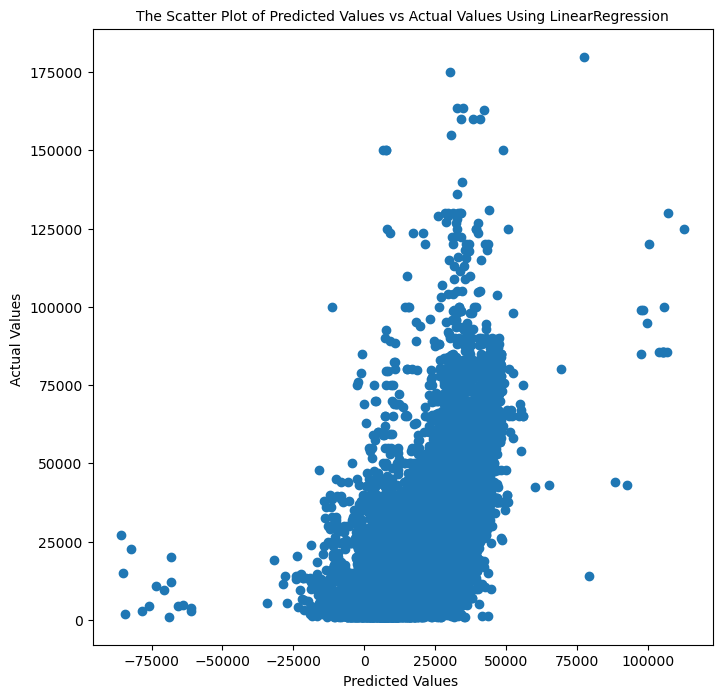

In [50]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(lr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using LinearRegression', size=10)
plt.show();

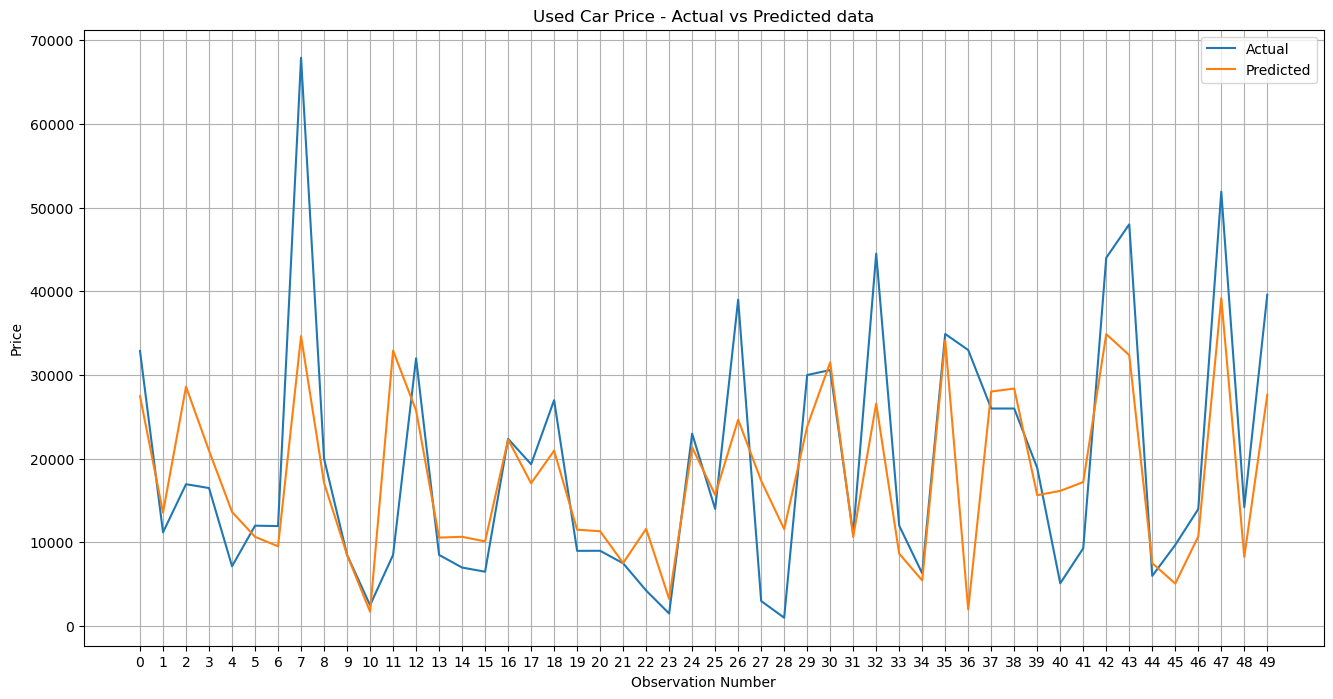

In [51]:
plot_actual_predict(lr)

### RandomForestRegrssor

In [52]:
rf = RandomForestRegressor(n_estimators=150) #100, 150, 200
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

In [53]:
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.9820739244307332, 0.8738186024590883)

In [54]:
# test score is smaller than train score, this model is overfit
# add hyperparameter to improve the overfit

In [55]:
# the best params is max_depth:None, n_estimator:150, min_samples_split:2, min_samples_leaf:4 

# hyper_params = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [None, 4, 5, 6, 7],
#     'min_samples_split' : [2, 3, 5, 10, 15],
#     'min_samples_leaf' : [2, 3, 4, 5, 7]
# }

# rf_gs = GridSearchCV(rf, param_grid=hyper_params, cv=5, n_jobs=-1)
# rf_gs.fit(X_train, y_train)

In [56]:
# print(rf_gs.best_score_)
# print(rf_gs.best_params_)

In [57]:
rf_1= RandomForestRegressor(n_estimators=150, min_samples_leaf=2, min_samples_split=4) 
rf_1.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, n_estimators=150)

In [58]:
rf_1.score(X_train,y_train), rf_1.score(X_test,y_test) 

(0.9590313669721666, 0.8728568440370473)

In [59]:
# The train score and test score is smaller than the first run 
# but the overfit was improved
# The train score and test score are higher than linear regression model.

In [60]:
# The first rf run have higher test score, pick the first for the evaluation

rf_preds = rf.predict(X_test)

In [61]:
score.append(evaluation(X_train, y_train, X_test, y_test, rf_preds, rf))

train score: 0.9820739244307332
R2 (test score): 0.8738186024590883
RMSE: 5172.6996094738915


In [62]:
# the RMSE of randomforest is smaller than linear regression

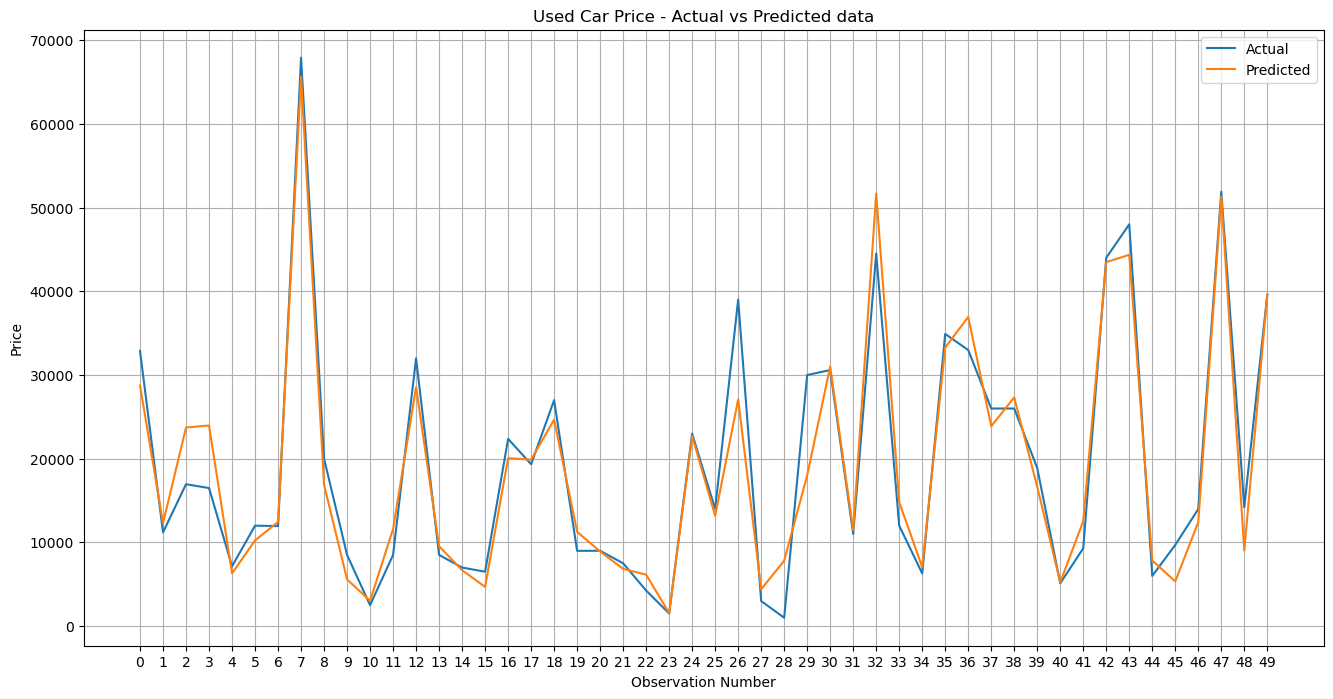

In [63]:
plot_actual_predict(rf)

In [64]:
# save the model for streamlit 

# with open('streamlit_app/car_rf.pkl', 'wb') as f:
#     pickle.dump(rf, f)

### ExtraTreesRegressor

In [65]:
# the best params is max_depth:None, n_estimator:100, min_samples_split:3 , min_samples_leaf:4 

# hyper_params = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [None, 4, 5, 6, 7],
#     'min_samples_split' : [2, 3, 5, 10, 15],
#     'min_samples_leaf' : [2, 3, 4, 5, 7]
# }

# etr_gs = GridSearchCV(etr, param_grid=hyper_params, cv=5, n_jobs=-1)
# etr_gs.fit(X_train, y_train)

In [66]:
# print(etr_gs.best_score_)
# print(etr_gs.best_params_)

In [67]:
etr = ExtraTreesRegressor(min_samples_leaf=3, min_samples_split=4) 
etr.fit(X_train,y_train)

ExtraTreesRegressor(min_samples_leaf=3, min_samples_split=4)

In [68]:
etr.score(X_train,y_train), etr.score(X_test,y_test)

(0.9524814471061451, 0.8743701381709258)

In [69]:
# The test score is higher than randomforest model.
# The train score is lower than randomforest model 
# extratrees model is less overfit than randomforest model
# This model perform better than linear regression

In [70]:
etr_preds = etr.predict(X_test)

In [71]:
score.append(evaluation(X_train, y_train, X_test, y_test, etr_preds, etr))

train score: 0.9524814471061451
R2 (test score): 0.8743701381709258
RMSE: 5161.382359195357


In [ ]:
# the RMSE of extratrees is smaller than randomforest and linear regression

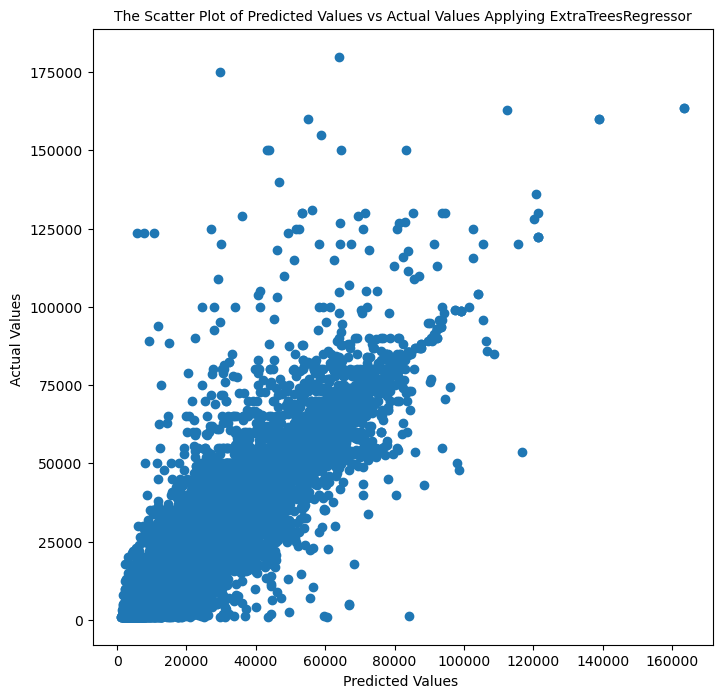

In [72]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(etr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Applying ExtraTreesRegressor', size=10)
plt.show();

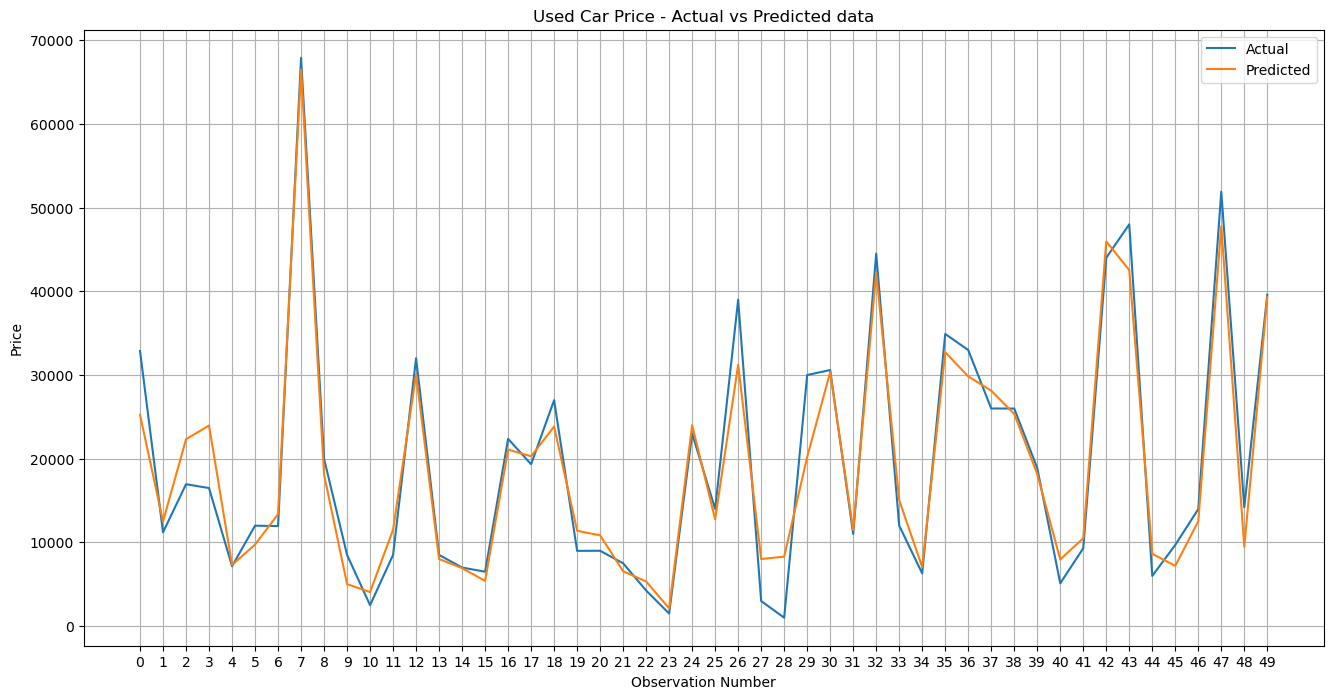

In [73]:
plot_actual_predict(etr)

In [74]:
# save the model for streamlit app

# with open('streamlit_app/car_etr.pkl', 'wb') as f:
#     pickle.dump(etr, f)

### AdaBoostRegressor

In [75]:
adr = AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=10))
adr.fit(X_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                  min_samples_split=10))

In [76]:
adr.score(X_train,y_train), adr.score(X_test,y_test)

(0.9610059765579874, 0.8716237867727852)

In [77]:
# add hyperparameters

In [78]:
adr_1 = AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5, #2, 5, 7
                                                          min_samples_split=7)) #10, 7, 5, 2
adr_1.fit(X_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                  min_samples_split=7))

In [79]:
adr_1.score(X_train,y_train), adr_1.score(X_test,y_test)

(0.95993399286941, 0.868956174383873)

In [80]:
# choose the first run of adaboost model to evaluate 
# because it have higher train score and test score

adr_preds= adr.predict(X_test)

In [81]:
score.append(evaluation(X_train, y_train, X_test, y_test, adr_preds, adr))

train score: 0.9610059765579874
R2 (test score): 0.8716237867727852
RMSE: 5217.492969663348


In [ ]:
# the test score did not improve compare to the extratreeregressor
# overfit did not improve
# the RMSE is higher

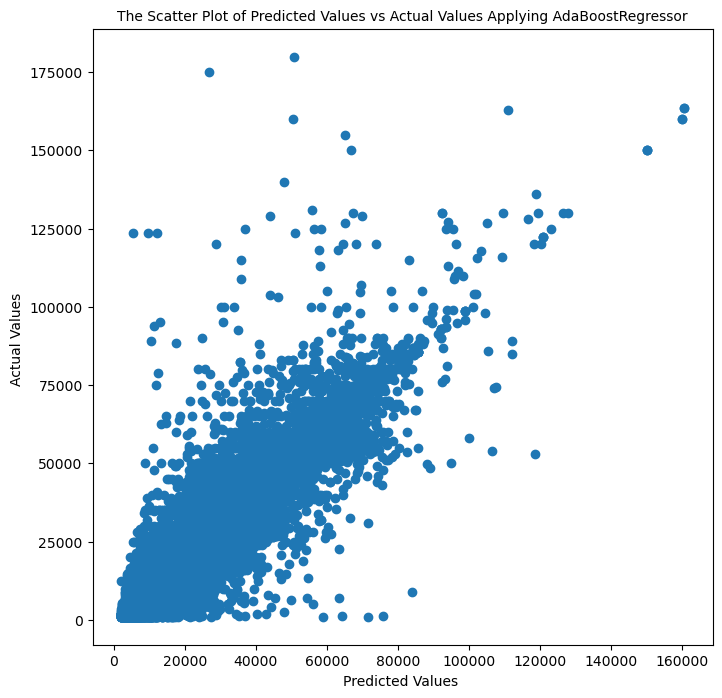

In [88]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(adr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Applying AdaBoostRegressor', size=10)
plt.show();

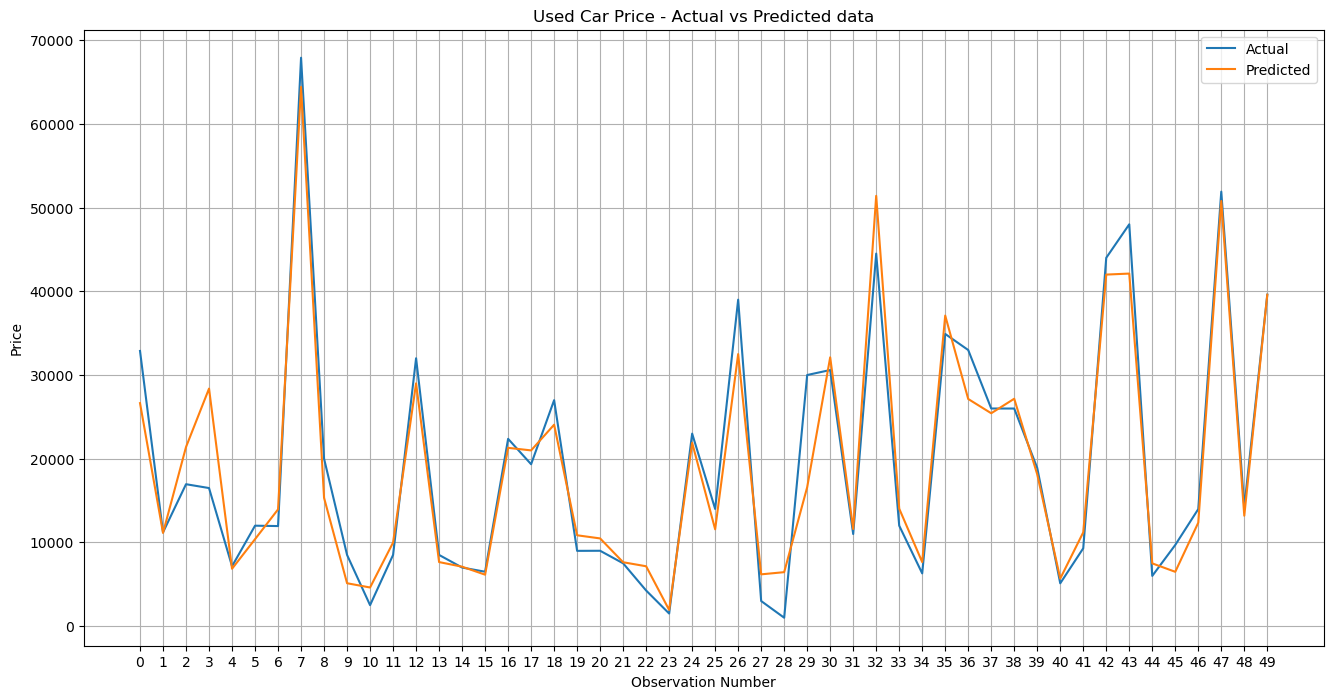

In [82]:
plot_actual_predict(adr)

### GradientBoosting Regressor

In [83]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [84]:
gbr_preds = gbr.predict(X_test)

In [85]:
score.append(evaluation(X_train, y_train, X_test, y_test, gbr_preds, gbr))

train score: 0.777255945774139
R2 (test score): 0.7746160996899142
RMSE: 6913.230497464723


In [ ]:
# train score and test score only higher than linear regression
# less overfit than all of the model above
# RMSE is high

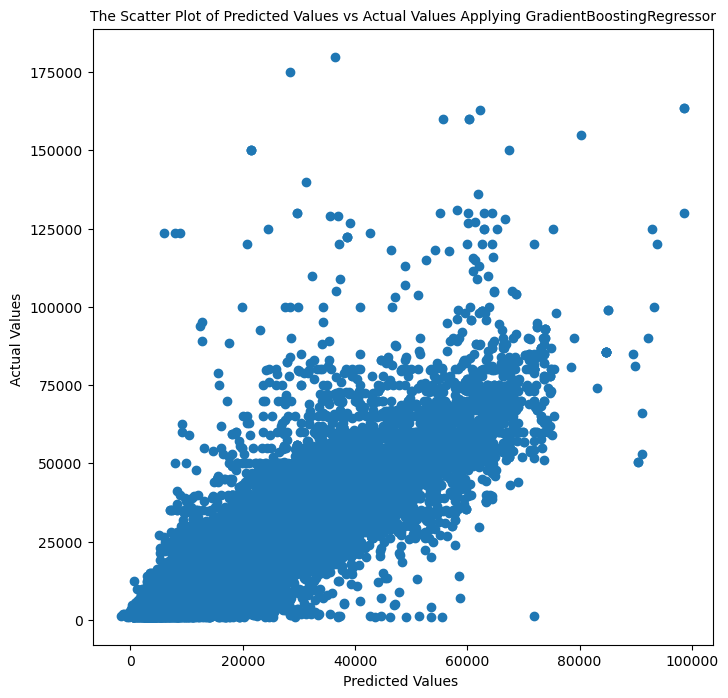

In [87]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(gbr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Applying GradientBoostingRegressor', size=10)
plt.show();

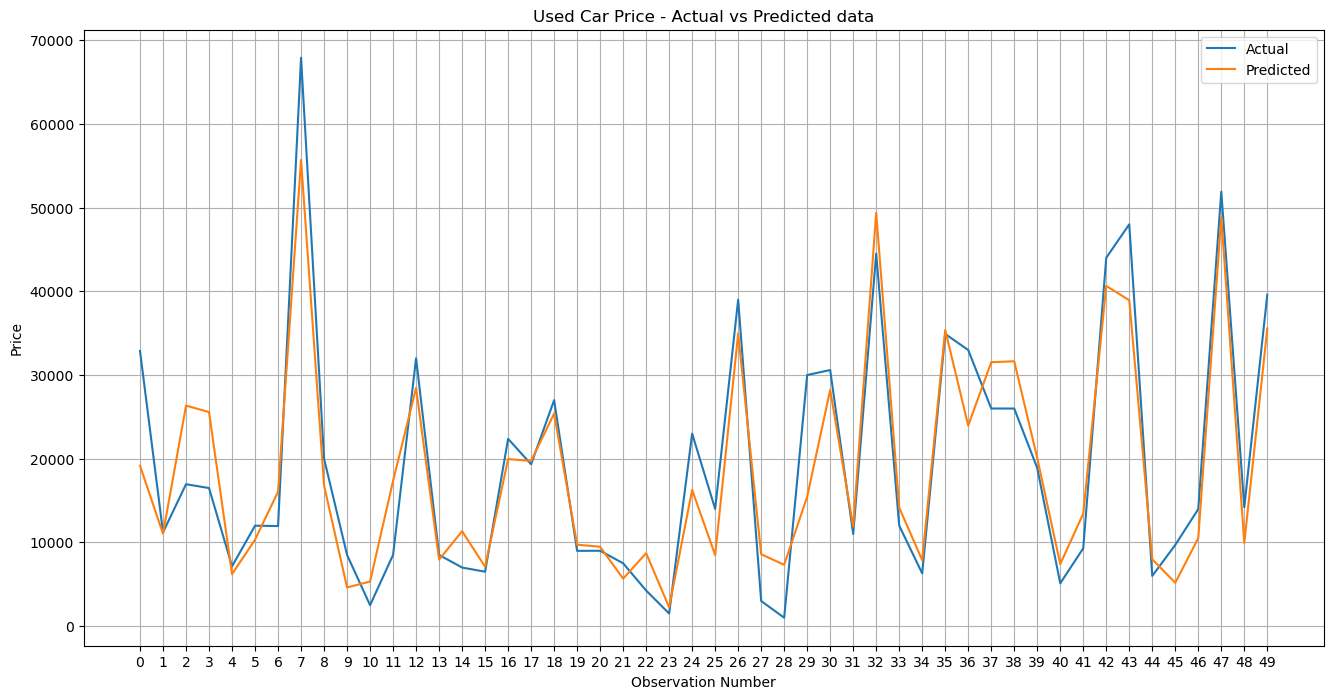

In [89]:
plot_actual_predict(gbr)

### Table of result

In [90]:
pd.DataFrame(score, index=['Linear Regression','Random Forest Regressor', 
                            'Extra Trees Regresssor', 'AdaBoost Regressor',
                            'GradientBoosting Regressor'])

,train score,R2 (test score),RMSE
Linear Regression,0.514047,0.520719,10081.259633
Random Forest Regressor,0.982074,0.873819,5172.699609
Extra Trees Regresssor,0.952481,0.874370,5161.382359
AdaBoost Regressor,0.961006,0.871624,5217.492970
GradientBoosting Regressor,0.777256,0.774616,6913.230497


### Build pipeline for models above 

In [91]:
# streamlit app work better with pipeline 

In [109]:
pipe_cont = Pipeline([
    ('ss', StandardScaler())
])

pipe_cats = Pipeline(
    [
        ('ohe', OneHotEncoder(drop = 'first'))
    ]
)

In [110]:
col_trans = ColumnTransformer(
    [
        ('num_ct', pipe_cont, make_column_selector(dtype_include = np.number)),
        ('cat_ct', pipe_cats, make_column_selector(dtype_include = object))
    ]
)

In [111]:
rf_pipe_price = Pipeline(
    [
        ('ct', col_trans),
        ('rf', RandomForestRegressor(n_estimators=150))
    ]
)

In [112]:
X = df_concat.drop(columns='price')
y = df_concat['price']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### RandomForestRegressor

In [ ]:
# This model is the same hyperparameter with the randomforest above

In [114]:
rf_pipe_price.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_ct',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2ab066b50>),
                                                 ('cat_ct',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1685f0390>)])),
                ('rf', RandomForestRegressor(n_estimators=150))])

In [115]:
rf_pipe_price.score(X_train, y_train), rf_pipe_price.score(X_test,y_test)

(0.982114106087143, 0.8740545385084947)

In [120]:
rf_pipe_preds = rf_pipe_price.predict(X_test)

In [121]:
score.append(evaluation(X_train, y_train, X_test, y_test, rf_pipe_preds, rf_pipe_price))

train score: 0.982114106087143
R2 (test score): 0.8740545385084947
RMSE: 5167.861347409541


In [ ]:
# This model have higher test score, train score and lower RMSE 
# compare with the randomforest without pipeline

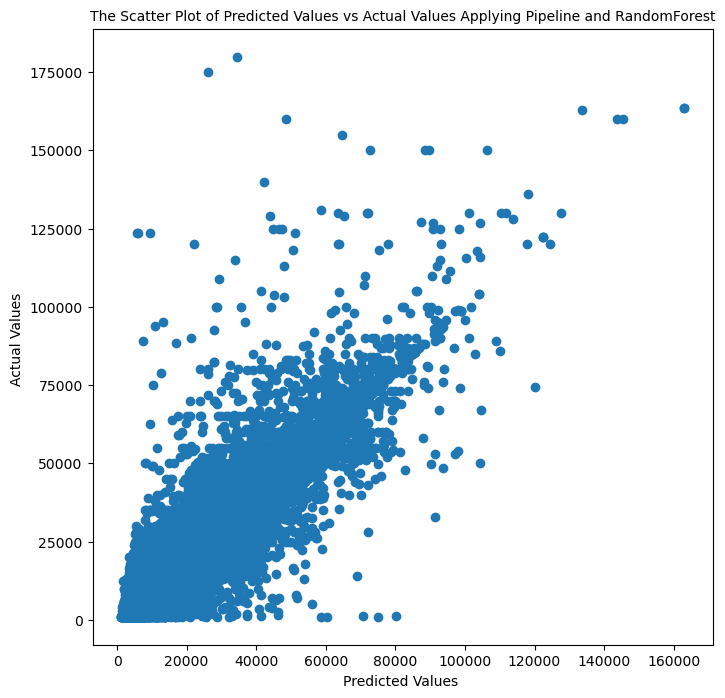

In [126]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(rf_pipe_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Applying Pipeline and RandomForest', size=10)
plt.show();

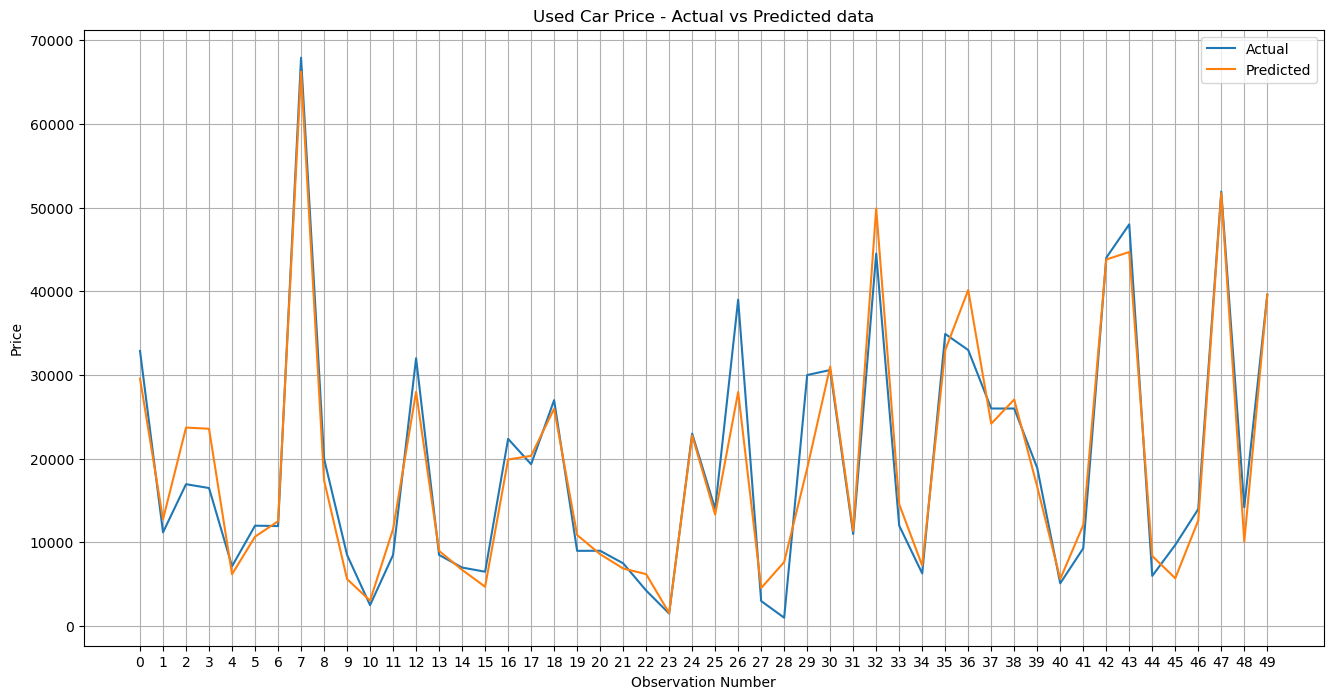

In [122]:
plot_actual_predict(rf_pipe_price)

In [116]:
# save the model for streamlit app

# with open('streamlit_app/rf_pipe_price.pkl', 'wb') as f:
#     pickle.dump(rf_pipe_price, f)

### ExtratreesRegressor

In [ ]:
# keep the hyper parameter as default

In [117]:
etr_pipe_price = Pipeline(
    [
        ('ct', col_trans),
        ('etr', ExtraTreesRegressor())
    ]
)

In [118]:
etr_pipe_price.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_ct',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2ab066b50>),
                                                 ('cat_ct',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1685f0390>)])),
                ('etr', ExtraTreesRegressor())])

In [119]:
etr_pipe_price.score(X_train, y_train), etr_pipe_price.score(X_test,y_test)

(0.9997840713175957, 0.8734873630489239)

In [127]:
etr_pipe_preds = etr_pipe_price.predict(X_test)

In [128]:
score.append(evaluation(X_train, y_train, X_test, y_test, etr_pipe_preds, etr_pipe_price))

train score: 0.9997840713175957
R2 (test score): 0.8734873630489239
RMSE: 5179.484599216748


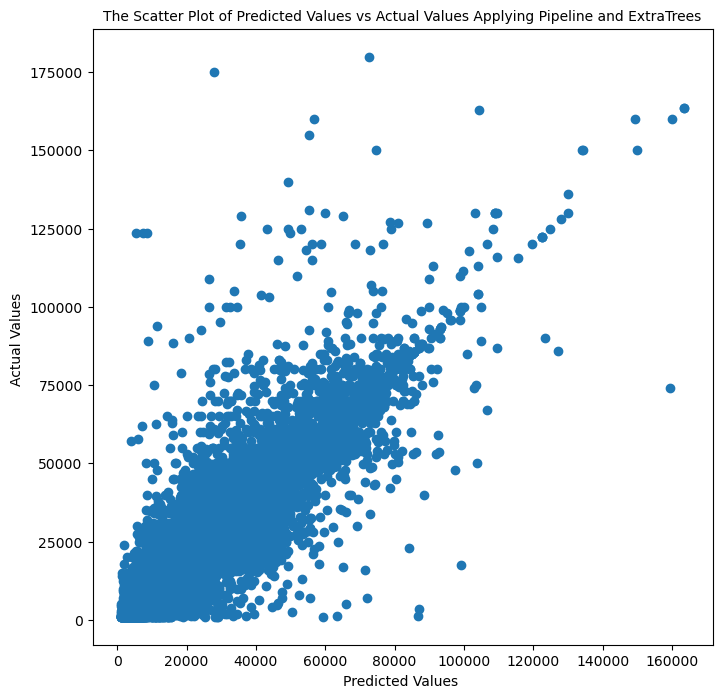

In [157]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(etr_pipe_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Applying Pipeline and ExtraTrees', size=10)
plt.show();

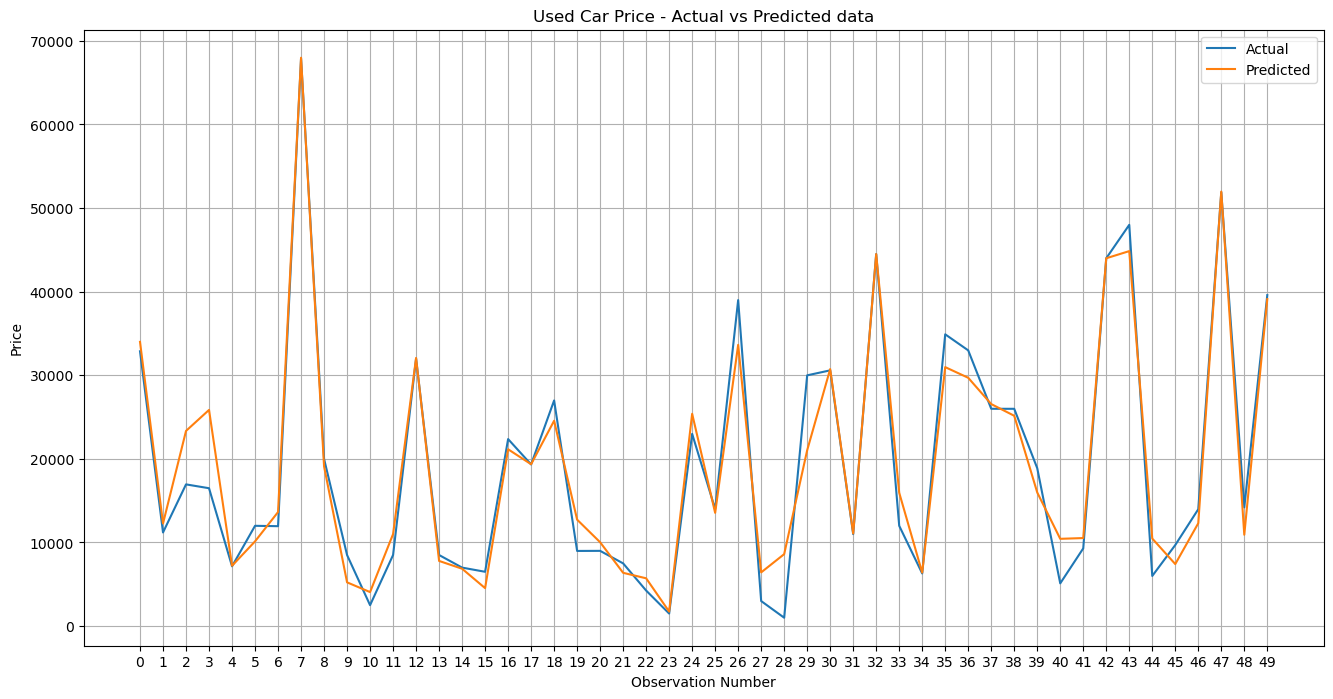

In [53]:
plot_actual_predict(etr_pipe_price)

In [45]:
# save model for streamlit app

# with open('streamlit_app/etr_pipe_price.pkl', 'wb') as f:
#     pickle.dump(etr_pipe_price, f)

## Table of results

In [156]:
pd.DataFrame(score, index=['Linear Regression','RandomForest Regressor', 
                            'ExtraTrees Regresssor', 'AdaBoost Regressor',
                            'GradientBoosting Regressor', 
                           'RandomForest Regressor(pipeline)',
                          'ExtraTrees Regressor(pipeline)'])

,train score,R2 (test score),RMSE
Linear Regression,0.514047,0.520719,10081.259633
RandomForest Regressor,0.982074,0.873819,5172.699609
ExtraTrees Regresssor,0.952481,0.874370,5161.382359
AdaBoost Regressor,0.961006,0.871624,5217.492970
GradientBoosting Regressor,0.777256,0.774616,6913.230497
RandomForest Regressor(pipeline),0.982114,0.874055,5167.861347
ExtraTrees Regressor(pipeline),0.999784,0.873487,5179.484599


## Conclusion